In [1]:
import sys
!{sys.executable} -m pip install spacy
!{sys.executable} -m spacy download en

You should consider upgrading via the '/Library/Frameworks/Python.framework/Versions/3.9/bin/python3.9 -m pip install --upgrade pip' command.
⚠ As of spaCy v3.0, shortcuts like 'en' are deprecated. Please use the
full pipeline package name 'en_core_web_sm' instead.
     ━━━━━━━━━━━━━━━━╸━━━━━━━━━━━━━━━━━━━━━━━ 5.3/12.8 MB 1.1 MB/s eta 0:00:07ERROR: Could not install packages due to an OSError: [Errno 28] No space left on device

     ━━━━━━━━━━━━━━━━╸━━━━━━━━━━━━━━━━━━━━━━━ 5.3/12.8 MB 1.1 MB/s eta 0:00:07
You should consider upgrading via the '/Library/Frameworks/Python.framework/Versions/3.9/bin/python3.9 -m pip install --upgrade pip' command.


In [2]:
import re
import numpy as np
import pandas as pd
from pprint import pprint

# Gensim
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel

# spacy for lemmatization
import spacy

# Plotting tools
!pip install pyLDAvis

import pyLDAvis
import pyLDAvis.gensim_models
import matplotlib.pyplot as plt
%matplotlib inline

# Enable logging for gensim - optional
import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.ERROR)

import warnings
warnings.filterwarnings("ignore",category=DeprecationWarning)

You should consider upgrading via the '/Library/Frameworks/Python.framework/Versions/3.9/bin/python3.9 -m pip install --upgrade pip' command.


In [3]:
import numpy as np
import pandas as pd
import re
import os
for dirname, _, filenames in os.walk('/Users/ragave/Downloads/MCU_Dataset'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/Users/ragave/Downloads/MCU_Dataset/Avengers.txt
/Users/ragave/Downloads/MCU_Dataset/Ant-Man.And.The.Wasp.txt
/Users/ragave/Downloads/MCU_Dataset/Avengers.Age.of.Ultron.txt
/Users/ragave/Downloads/MCU_Dataset/Ant-Man.txt
/Users/ragave/Downloads/MCU_Dataset/Captain.Marvel.txt
/Users/ragave/Downloads/MCU_Dataset/Captain.America.Civil.War.txt
/Users/ragave/Downloads/MCU_Dataset/Spider-Man.Homecoming.txt
/Users/ragave/Downloads/MCU_Dataset/Captain.America.The.Winter.Soldier.txt
/Users/ragave/Downloads/MCU_Dataset/Doctor.Strange.txt
/Users/ragave/Downloads/MCU_Dataset/The.Incredible.Hulk.txt
/Users/ragave/Downloads/MCU_Dataset/Spider-Man.Far.From.Home.txt
/Users/ragave/Downloads/MCU_Dataset/Iron-Man.3.txt
/Users/ragave/Downloads/MCU_Dataset/Iron-Man.2.txt
/Users/ragave/Downloads/MCU_Dataset/Guardians.of.the.Galaxy.txt
/Users/ragave/Downloads/MCU_Dataset/Thor.The.Dark.World.txt
/Users/ragave/Downloads/MCU_Dataset/Guardians.of.the.Galaxy.Vol. 2.txt
/Users/ragave/Downloads/MCU_Dataset/Iron-Man

In [4]:
filename_list = os.listdir('/Users/ragave/Downloads/MCU_Dataset/')
movie_list = [movie.replace('.txt','').replace('.',' ').replace('-',' ') for movie in filename_list]
dialogue_list = [open(f'/Users/ragave/Downloads/MCU_Dataset/{files}','r',errors='ignore').readlines() for files in filename_list]
data = {'Filename':filename_list,'Movie Name':movie_list,'Dialogues':dialogue_list}
df = pd.DataFrame(data=data)
df.head(23)

Filename  \
0                             Avengers.txt   
1                 Ant-Man.And.The.Wasp.txt   
2               Avengers.Age.of.Ultron.txt   
3                              Ant-Man.txt   
4                       Captain.Marvel.txt   
5            Captain.America.Civil.War.txt   
6                Spider-Man.Homecoming.txt   
7   Captain.America.The.Winter.Soldier.txt   
8                       Doctor.Strange.txt   
9                  The.Incredible.Hulk.txt   
10            Spider-Man.Far.From.Home.txt   
11                          Iron-Man.3.txt   
12                          Iron-Man.2.txt   
13             Guardians.of.the.Galaxy.txt   
14                 Thor.The.Dark.World.txt   
15      Guardians.of.the.Galaxy.Vol. 2.txt   
16                            Iron-Man.txt   
17   Captain.America.The.First.Avenger.txt   
18                    Avengers.Endgame.txt   
19                                Thor.txt   
20                       Thor.Ragnarok.txt   
21               Avengers.Infinity.War.txt   
22                       Black.Panther.txt   

                            Movie Name  \
0                             Avengers   
1                 Ant Man And The Wasp   
2               Avengers Age of Ultron   
3                              Ant Man   
4                       Captain Marvel   
5            Captain America Civil War   
6                Spider Man Homecoming   
7   Captain America The Winter Soldier   
8                       Doctor Strange   
9                  The Incredible Hulk   
10            Spider Man Far From Home   
11                          Iron Man 3   
12                          Iron Man 2   
13             Guardians of the Galaxy   
14                 Thor The Dark World   
15      Guardians of the Galaxy Vol  2   
16                            Iron Man   
17   Captain America The First Avenger   
18                    Avengers Endgame   
19                                Thor   
20                       Thor Ragnarok   
21               Avengers Infinity War   
22                       Black Panther   

                                            Dialogues  
0   [The Tesseract has awakened.\n, It is on a lit...  
1   [I still think about the night\n, your mother ...  
2   [(DISTANT EXPLOSION)\n, STRUCKER ON PA: Report...  
3   [Stark!\n, He doesn't seem happy.\n, Hello, Ha...  
4   [Do you know what time it is?\n, Can't sleep.\...  
5   [(BUCKY SCREAMING)\n, (CONTINUES SCREAMING)\n,...  
6   [Things are never gonna be the same now.\n, I ...  
7   [On your left.\n, On your left.\n, On my left....  
8   [Master Kaecilius.\n, That ritual will bring y...  
9   [Is it ready?\n, (SPEAKING PORTUGUESE)\n, Hey!...  
10  [Nick, this was a tragedy, but it's not why we...  
11  [TONY: A famous man once said,\n, "We create o...  
12  [Been a while since I was up here in front of ...  
13  [Peter.\n, Your momma wants to speak with you....  
14  [Long before the birth of light, there was dar...  
15  [There's a girl in this harbor town\n, And she...  
16  [I feel like you're driving me to a court-mart...  
17  [Are you the guys from Washington?\n, You get ...  
18  [Okay, hold on, don't shoot.\n, - You see wher...  
19  [(BEEPING)\n, Wait for it.\n, - Can I turn on ...  
20  [Now, I know what you're thinking.\n, "Oh, no!...  
21  [This is the Asgardian\n, refugee vessel State...  
22  [Baba...\n, Yes, my son.\n, Tell me a story.\n...

In [5]:
patrn = re.compile('\([A-Z ]*\)')
def filter_dialogue(dia_list):
    dia_list = [lines.replace('\n','') for lines in dia_list]
    mod_list = [patrn.sub('',lines) for lines in dia_list]
    return list(filter(None, mod_list))

In [6]:
df['no of dialogues'] = df['Dialogues'].apply(lambda x: len(x))
df.head(23)

Filename  \
0                             Avengers.txt   
1                 Ant-Man.And.The.Wasp.txt   
2               Avengers.Age.of.Ultron.txt   
3                              Ant-Man.txt   
4                       Captain.Marvel.txt   
5            Captain.America.Civil.War.txt   
6                Spider-Man.Homecoming.txt   
7   Captain.America.The.Winter.Soldier.txt   
8                       Doctor.Strange.txt   
9                  The.Incredible.Hulk.txt   
10            Spider-Man.Far.From.Home.txt   
11                          Iron-Man.3.txt   
12                          Iron-Man.2.txt   
13             Guardians.of.the.Galaxy.txt   
14                 Thor.The.Dark.World.txt   
15      Guardians.of.the.Galaxy.Vol. 2.txt   
16                            Iron-Man.txt   
17   Captain.America.The.First.Avenger.txt   
18                    Avengers.Endgame.txt   
19                                Thor.txt   
20                       Thor.Ragnarok.txt   
21               Avengers.Infinity.War.txt   
22                       Black.Panther.txt   

                            Movie Name  \
0                             Avengers   
1                 Ant Man And The Wasp   
2               Avengers Age of Ultron   
3                              Ant Man   
4                       Captain Marvel   
5            Captain America Civil War   
6                Spider Man Homecoming   
7   Captain America The Winter Soldier   
8                       Doctor Strange   
9                  The Incredible Hulk   
10            Spider Man Far From Home   
11                          Iron Man 3   
12                          Iron Man 2   
13             Guardians of the Galaxy   
14                 Thor The Dark World   
15      Guardians of the Galaxy Vol  2   
16                            Iron Man   
17   Captain America The First Avenger   
18                    Avengers Endgame   
19                                Thor   
20                       Thor Ragnarok   
21               Avengers Infinity War   
22                       Black Panther   

                                            Dialogues  no of dialogues  
0   [The Tesseract has awakened.\n, It is on a lit...             1753  
1   [I still think about the night\n, your mother ...             1930  
2   [(DISTANT EXPLOSION)\n, STRUCKER ON PA: Report...             2157  
3   [Stark!\n, He doesn't seem happy.\n, Hello, Ha...             1553  
4   [Do you know what time it is?\n, Can't sleep.\...             1424  
5   [(BUCKY SCREAMING)\n, (CONTINUES SCREAMING)\n,...             2105  
6   [Things are never gonna be the same now.\n, I ...             2066  
7   [On your left.\n, On your left.\n, On my left....             1487  
8   [Master Kaecilius.\n, That ritual will bring y...             1319  
9   [Is it ready?\n, (SPEAKING PORTUGUESE)\n, Hey!...              825  
10  [Nick, this was a tragedy, but it's not why we...             1725  
11  [TONY: A famous man once said,\n, "We create o...             2171  
12  [Been a while since I was up here in front of ...             1532  
13  [Peter.\n, Your momma wants to speak with you....             1294  
14  [Long before the birth of light, there was dar...             1127  
15  [There's a girl in this harbor town\n, And she...             1622  
16  [I feel like you're driving me to a court-mart...             1336  
17  [Are you the guys from Washington?\n, You get ...             1200  
18  [Okay, hold on, don't shoot.\n, - You see wher...             2160  
19  [(BEEPING)\n, Wait for it.\n, - Can I turn on ...             1190  
20  [Now, I know what you're thinking.\n, "Oh, no!...             1568  
21  [This is the Asgardian\n, refugee vessel State...             1723  
22  [Baba...\n, Yes, my son.\n, Tell me a story.\n...             1574

In [7]:
df['edited_dialogues'] = df['Dialogues'].apply(lambda x: filter_dialogue(x))
df['no of dialogues_edited'] = df['edited_dialogues'].apply(lambda x: len(x))
df.head(23)

Filename  \
0                             Avengers.txt   
1                 Ant-Man.And.The.Wasp.txt   
2               Avengers.Age.of.Ultron.txt   
3                              Ant-Man.txt   
4                       Captain.Marvel.txt   
5            Captain.America.Civil.War.txt   
6                Spider-Man.Homecoming.txt   
7   Captain.America.The.Winter.Soldier.txt   
8                       Doctor.Strange.txt   
9                  The.Incredible.Hulk.txt   
10            Spider-Man.Far.From.Home.txt   
11                          Iron-Man.3.txt   
12                          Iron-Man.2.txt   
13             Guardians.of.the.Galaxy.txt   
14                 Thor.The.Dark.World.txt   
15      Guardians.of.the.Galaxy.Vol. 2.txt   
16                            Iron-Man.txt   
17   Captain.America.The.First.Avenger.txt   
18                    Avengers.Endgame.txt   
19                                Thor.txt   
20                       Thor.Ragnarok.txt   
21               Avengers.Infinity.War.txt   
22                       Black.Panther.txt   

                            Movie Name  \
0                             Avengers   
1                 Ant Man And The Wasp   
2               Avengers Age of Ultron   
3                              Ant Man   
4                       Captain Marvel   
5            Captain America Civil War   
6                Spider Man Homecoming   
7   Captain America The Winter Soldier   
8                       Doctor Strange   
9                  The Incredible Hulk   
10            Spider Man Far From Home   
11                          Iron Man 3   
12                          Iron Man 2   
13             Guardians of the Galaxy   
14                 Thor The Dark World   
15      Guardians of the Galaxy Vol  2   
16                            Iron Man   
17   Captain America The First Avenger   
18                    Avengers Endgame   
19                                Thor   
20                       Thor Ragnarok   
21               Avengers Infinity War   
22                       Black Panther   

                                            Dialogues  no of dialogues  \
0   [The Tesseract has awakened.\n, It is on a lit...             1753   
1   [I still think about the night\n, your mother ...             1930   
2   [(DISTANT EXPLOSION)\n, STRUCKER ON PA: Report...             2157   
3   [Stark!\n, He doesn't seem happy.\n, Hello, Ha...             1553   
4   [Do you know what time it is?\n, Can't sleep.\...             1424   
5   [(BUCKY SCREAMING)\n, (CONTINUES SCREAMING)\n,...             2105   
6   [Things are never gonna be the same now.\n, I ...             2066   
7   [On your left.\n, On your left.\n, On my left....             1487   
8   [Master Kaecilius.\n, That ritual will bring y...             1319   
9   [Is it ready?\n, (SPEAKING PORTUGUESE)\n, Hey!...              825   
10  [Nick, this was a tragedy, but it's not why we...             1725   
11  [TONY: A famous man once said,\n, "We create o...             2171   
12  [Been a while since I was up here in front of ...             1532   
13  [Peter.\n, Your momma wants to speak with you....             1294   
14  [Long before the birth of light, there was dar...             1127   
15  [There's a girl in this harbor town\n, And she...             1622   
16  [I feel like you're driving me to a court-mart...             1336   
17  [Are you the guys from Washington?\n, You get ...             1200   
18  [Okay, hold on, don't shoot.\n, - You see wher...             2160   
19  [(BEEPING)\n, Wait for it.\n, - Can I turn on ...             1190   
20  [Now, I know what you're thinking.\n, "Oh, no!...             1568   
21  [This is the Asgardian\n, refugee vessel State...             1723   
22  [Baba...\n, Yes, my son.\n, Tell me a story.\n...             1574   

                                     edited_dialogues  no of dialogues_edited  
0   [The Tesseract has awakened., It is on a littl...          

In [8]:
# import the necessary libraries
import nltk
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords

In [9]:
# Remove the columns
MCU = df[['Movie Name', 'edited_dialogues']]
MCU

Movie Name  \
0                             Avengers   
1                 Ant Man And The Wasp   
2               Avengers Age of Ultron   
3                              Ant Man   
4                       Captain Marvel   
5            Captain America Civil War   
6                Spider Man Homecoming   
7   Captain America The Winter Soldier   
8                       Doctor Strange   
9                  The Incredible Hulk   
10            Spider Man Far From Home   
11                          Iron Man 3   
12                          Iron Man 2   
13             Guardians of the Galaxy   
14                 Thor The Dark World   
15      Guardians of the Galaxy Vol  2   
16                            Iron Man   
17   Captain America The First Avenger   
18                    Avengers Endgame   
19                                Thor   
20                       Thor Ragnarok   
21               Avengers Infinity War   
22                       Black Panther   

                                     edited_dialogues  
0   [The Tesseract has awakened., It is on a littl...  
1   [I still think about the night, your mother an...  
2   [STRUCKER ON PA: Report to your stations immed...  
3   [Stark!, He doesn't seem happy., Hello, Hank.,...  
4   [Do you know what time it is?, Can't sleep., T...  
5   [-  - , Longing, Rusted, Seventeen, Daybreak, ...  
6   [Things are never gonna be the same now., I me...  
7   [On your left., On your left., On my left. Got...  
8   [Master Kaecilius., That ritual will bring you...  
9   [Is it ready?, Hey! That's a great punch.,  Fe...  
10  [Nick, this was a tragedy, but it's not why we...  
11  [TONY: A famous man once said,, "We create our...  
12  [Been a while since I was up here in front of ...  
13  [Peter., Your momma wants to speak with you., ...  
14  [Long before the birth of light, there was dar...  
15  [There's a girl in this harbor town, And she w...  
16  [I feel like you're driving me to a court-mart...  
17  [Are you the guys from Washington?, You get ma...  
18  [Okay, hold on, don't shoot., - You see where ...  
19  [Wait for it., - Can I turn on the radio? - No...  
20  [Now, I know what you're thinking., "Oh, no! T...  
21  [This is the Asgardian, refugee vessel Statesm...  
22  [Baba..., Yes, my son., Tell me a story., Whic...

In [10]:
#remove punctuation/lower casing

# Load the regular expression library
import re
# Remove punctuation
MCU['edited_dialogues_processed'] = \
MCU['edited_dialogues'].map(lambda x: re.sub('[,\.!?]', '', str(x)))
# Convert the titles to lowercase
MCU['edited_dialogues_processed'] = \
MCU['edited_dialogues_processed'].map(lambda x: x.lower())
# Print out the first rows of papers
MCU['edited_dialogues_processed'].head()

/var/folders/07/j260f3x91lxby88hm9cgplww0000gn/T/ipykernel_83118/529704686.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  MCU['edited_dialogues_processed'] = \
/var/folders/07/j260f3x91lxby88hm9cgplww0000gn/T/ipykernel_83118/529704686.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  MCU['edited_dialogues_processed'] = \


0    ['the tesseract has awakened' 'it is on a litt...
1    ['i still think about the night' 'your mother ...
2    ['strucker on pa: report to your stations imme...
3    ['stark' "he doesn't seem happy" 'hello hank' ...
4    ['do you know what time it is' "can't sleep" '...
Name: edited_dialogues_processed, dtype: object

In [11]:
#prepare data for LDA analysis 
import gensim
from gensim.utils import simple_preprocess
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
stop_words.extend(['from', 'subject', 're', 'edu', 'use'])
def sent_to_words(sentences):
    for sentence in sentences:
        # deacc=True removes punctuations
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))
def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) 
             if word not in stop_words] for doc in texts]
data = MCU.edited_dialogues_processed.values.tolist()
data_words = list(sent_to_words(data))
# remove stop words
data_words = remove_stopwords(data_words)
print(data_words[:1][0][:30])

[nltk_data] Error loading stopwords: <urlopen error [SSL:
[nltk_data]     CERTIFICATE_VERIFY_FAILED] certificate verify failed:
[nltk_data]     unable to get local issuer certificate (_ssl.c:1129)>


['tesseract', 'awakened', 'little', 'world', 'human', 'world', 'would', 'wield', 'power', 'ally', 'knows', 'workings', 'never', 'ready', 'lead', 'force', 'chitauri', 'follow', 'world', 'universe', 'humans', 'burn', 'personnel', 'evacuation', 'order', 'confirmed', 'bad', 'problem', 'sir', 'know']


In [12]:
#tokenize words and clean-up text 
def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))  # deacc=True removes punctuations

MCU_words = list(sent_to_words(MCU))

print(data_words[:1])

[['tesseract', 'awakened', 'little', 'world', 'human', 'world', 'would', 'wield', 'power', 'ally', 'knows', 'workings', 'never', 'ready', 'lead', 'force', 'chitauri', 'follow', 'world', 'universe', 'humans', 'burn', 'personnel', 'evacuation', 'order', 'confirmed', 'bad', 'problem', 'sir', 'know', 'dr', 'selvig', 'read', 'energy', 'surge', 'tesseract', 'four', 'hours', 'ago', 'nasa', 'authorise', 'selvig', 'go', 'test', 'phase', 'testing', 'even', 'room', 'spontaneous', 'event', 'turned', 'energy', 'levels', 'climbing', 'selvig', 'shut', 'ordered', 'evac', 'long', 'get', 'everyone', 'campus', 'clear', 'next', 'half', 'hour', 'better', 'sir', 'evacuation', 'may', 'futile', 'tell', 'go', 'back', 'sleep', 'control', 'tesseract', 'energy', 'may', 'minimum', 'safe', 'distance', 'need', 'make', 'sure', 'phase', 'prototypes', 'shipped', 'sir', 'really', 'priority', 'right', 'time', 'world', 'ends', 'act', 'though', 'intends', 'spin', 'clear', 'tech', 'every', 'piece', 'phase', 'truck', 'gone',

In [13]:
#creating bigram and trigram models
#bigrams - two words frequently occuring together in the document
#trigrams - three words frequently occuring together
#genism's phrases model can build and implement the bigrams, trigrams, quadgrams and more

# Build the bigram and trigram models
bigram = gensim.models.Phrases(data_words, min_count=5, threshold=100) # higher threshold fewer phrases.
trigram = gensim.models.Phrases(bigram[data_words], threshold=100)  

# Faster way to get a sentence clubbed as a trigram/bigram
bigram_mod = gensim.models.phrases.Phraser(bigram)
trigram_mod = gensim.models.phrases.Phraser(trigram)

# See trigram example
print(trigram_mod[bigram_mod[data_words[0]]])

['tesseract', 'awakened', 'little', 'world', 'human', 'world', 'would', 'wield', 'power', 'ally', 'knows', 'workings', 'never', 'ready', 'lead', 'force', 'chitauri', 'follow', 'world', 'universe', 'humans', 'burn', 'personnel', 'evacuation', 'order', 'confirmed', 'bad', 'problem', 'sir', 'know', 'dr_selvig', 'read', 'energy', 'surge', 'tesseract', 'four', 'hours', 'ago', 'nasa', 'authorise', 'selvig', 'go', 'test', 'phase', 'testing', 'even', 'room', 'spontaneous', 'event', 'turned', 'energy', 'levels', 'climbing', 'selvig', 'shut', 'ordered', 'evac', 'long', 'get', 'everyone', 'campus', 'clear', 'next', 'half', 'hour', 'better', 'sir', 'evacuation', 'may', 'futile', 'tell', 'go', 'back', 'sleep', 'control', 'tesseract', 'energy', 'may', 'minimum', 'safe', 'distance', 'need', 'make', 'sure', 'phase', 'prototypes', 'shipped', 'sir', 'really', 'priority', 'right', 'time', 'world', 'ends', 'act', 'though', 'intends', 'spin', 'clear', 'tech', 'every', 'piece', 'phase', 'truck', 'gone', 'ye

In [14]:
#remove stopwords, make bigrams and lemmatize 

# Define functions for stopwords, bigrams, trigrams and lemmatization
def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts]

def make_bigrams(texts):
    return [bigram_mod[doc] for doc in texts]

def make_trigrams(texts):
    return [trigram_mod[bigram_mod[doc]] for doc in texts]

def lemmatization(texts, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
    """https://spacy.io/api/annotation"""
    texts_out = []
    for sent in texts:
        doc = nlp(" ".join(sent)) 
        texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
    return texts_out

In [15]:
# spacy for lemmatization
import spacy

# Remove Stop Words
data_words_nostops = remove_stopwords(data_words)

# Form Bigrams
data_words_bigrams = make_bigrams(data_words_nostops)

# Initialize spacy 'en' model, keeping only tagger component (for efficiency)
# python3 -m spacy download en
nlp = spacy.load("en_core_web_sm")

# Do lemmatization keeping only noun, adj, vb, adv
data_lemmatized = lemmatization(data_words_bigrams, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV'])

print(data_lemmatized[:1])

[['tesseract', 'awaken', 'little', 'world', 'human', 'world', 'wield', 'power', 'ally', 'know', 'working', 'never', 'ready', 'lead', 'force', 'universe', 'human', 'burn', 'personnel', 'evacuation', 'order', 'confirm', 'bad', 'problem', 'sir', 'know', 'read', 'energy', 'surge', 'tesseract', 'hour', 'ago', 'authorise', 'go', 'test', 'phase', 'testing', 'even', 'room', 'spontaneous', 'event', 'turn', 'energy', 'level', 'climb', 'selvig', 'shut', 'order', 'evac', 'long', 'get', 'campus', 'clear', 'next', 'half', 'hour', 'well', 'sir', 'evacuation', 'futile', 'go', 'back', 'sleep', 'control', 'tesseract', 'energy', 'minimum', 'safe', 'distance', 'make', 'sure', 'phase', 'prototype', 'ship', 'sir', 'really', 'priority', 'right', 'time', 'world', 'end', 'act', 'intend', 'spin', 'clear', 'tech', 'piece', 'phase', 'truck', 'go', 'sir', 'talk', 'doctor', 'director', 'know', 'certain', 'tesseract', 'misbehaving', 'suppose', 'funny', 'funny', 'tesseract', 'active', 'behaving', 'assume', 'pull', 'e

In [16]:
#create the dictionary and corpus needed for topic modelling
# Create Dictionary
id2word = corpora.Dictionary(data_lemmatized)

# Create Corpus
texts = data_lemmatized

# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]

# View
print(corpus[:1])

#gensim creates a unique id for each word in the document 
#the produced corpus shown is a mappibg of (word_id, word_frequency)

[[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 2), (7, 1), (8, 2), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (15, 1), (16, 5), (17, 1), (18, 1), (19, 3), (20, 1), (21, 9), (22, 1), (23, 1), (24, 1), (25, 3), (26, 1), (27, 2), (28, 3), (29, 2), (30, 5), (31, 2), (32, 3), (33, 1), (34, 1), (35, 5), (36, 1), (37, 1), (38, 1), (39, 1), (40, 5), (41, 1), (42, 1), (43, 1), (44, 1), (45, 1), (46, 2), (47, 1), (48, 1), (49, 1), (50, 1), (51, 1), (52, 3), (53, 1), (54, 1), (55, 1), (56, 3), (57, 1), (58, 5), (59, 2), (60, 1), (61, 1), (62, 5), (63, 2), (64, 1), (65, 7), (66, 2), (67, 4), (68, 1), (69, 3), (70, 2), (71, 1), (72, 3), (73, 1), (74, 10), (75, 3), (76, 2), (77, 1), (78, 1), (79, 7), (80, 1), (81, 1), (82, 2), (83, 15), (84, 6), (85, 2), (86, 1), (87, 1), (88, 2), (89, 12), (90, 2), (91, 1), (92, 2), (93, 5), (94, 3), (95, 1), (96, 1), (97, 1), (98, 1), (99, 1), (100, 4), (101, 1), (102, 2), (103, 1), (104, 1), (105, 2), (106, 1), (107, 3), (108, 1), (109, 1), (110,

You should consider upgrading via the '/Library/Frameworks/Python.framework/Versions/3.9/bin/python3.9 -m pip install --upgrade pip' command.


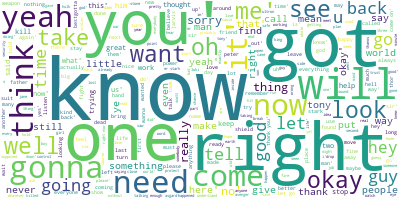

In [25]:
# Import the wordcloud library
!pip install wordcloud
from wordcloud import WordCloud

# Join the different processed titles together.
long_string = ','.join(list(MCU['edited_dialogues_processed'].values))

# Create a WordCloud object
wordcloud = WordCloud(background_color="white", max_words=1000, contour_width=3, contour_color='steelblue')

# Generate a word cloud
wordcloud.generate(long_string)

# Visualize the word cloud
wordcloud.to_image()

# CorEX

In [17]:
import numpy as np
import scipy.sparse as ss
import matplotlib.pyplot as plt

!pip install corextopic
!pip install networkx
import corextopic.corextopic as ct
import corextopic.vis_topic as vt # jupyter notebooks will complain matplotlib is being loaded twice

from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer

%matplotlib inline

You should consider upgrading via the '/Library/Frameworks/Python.framework/Versions/3.9/bin/python3.9 -m pip install --upgrade pip' command.
You should consider upgrading via the '/Library/Frameworks/Python.framework/Versions/3.9/bin/python3.9 -m pip install --upgrade pip' command.


In [18]:
CorEX_MCU = MCU[['edited_dialogues']]

In [19]:
# Transform MCU data into a sparse matrix
vectorizer = CountVectorizer(stop_words='english', max_features=20000, binary=True)
doc_word = vectorizer.fit_transform(data)
doc_word = ss.csr_matrix(doc_word)

doc_word.shape # n_docs x m_words

#the doc-word matrix is 23 document by 11,025 words. 

(23, 11025)

In [20]:
#getting the words that label the columns 
#needed for outputting readable topics and later for anchoring 

# Get words that label the columns (needed to extract readable topics and make anchoring easier)
words = list(np.asarray(vectorizer.get_feature_names()))

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [21]:
#removing all integers from the set of words
not_digit_inds = [ind for ind,word in enumerate(words) if not word.isdigit()]
doc_word = doc_word[:,not_digit_inds]
words    = [word for ind,word in enumerate(words) if not word.isdigit()]

doc_word.shape # n_docs x m_words

#brings it down to 10,883 words 

(23, 10883)

In [38]:
# Anchor Keywords
keywords =   [
              ["Tony", "Stark"],
              ["suit", "shield", "web", "arm"],
              ["world"],
              ["look","help", "go"]
             ]

anchor_strength = 3

#train a topic model with 15 topics
# Train the CorEx topic model with 15 topics
topic_model = ct.Corex(n_hidden=5, words=words, max_iter=200, verbose=False, seed=1, anchors = keywords, anchor_strength = anchor_strength)
topic_model.fit(doc_word, words=words);

In [39]:
# Print a single topic from CorEx topic model
topic_model.get_topics(topic=1, n_words=10)

#the topic words are those with the highest mutual information with the topic, rather than those with highest probability
# within the topic as in LDA
#-1 sign means the absence of a word is informative in that topic, rather than its presence

[('ex', 0.412522391752476, 1.0),
 ('planets', 0.3508431749651264, -1.0),
 ('peter', 0.3508431749651264, -1.0),
 ('started', 0.3324819983650199, 1.0),
 ('passed', 0.2819556713121423, -1.0),
 ('girls', 0.2819556713121423, -1.0),
 ('triggered', 0.25822562682126743, 1.0),
 ('plastic', 0.25822562682126743, 1.0),
 ('bay', 0.25822562682126743, 1.0),
 ('conversation', 0.2545906694236759, -1.0)]

In [40]:
# Print all topics from the CorEx topic model
topics = topic_model.get_topics()
for n,topic in enumerate(topics):
    topic_words,_,_ = zip(*topic)
    print('{}: '.format(n) + ', '.join(topic_words))

0: handle, basically, arms, brilliant, potential, eggs, clean, focus, radio, vision
1: ex, planets, peter, started, passed, girls, triggered, plastic, bay, conversation
2: hammer, quiet, north, stealing, king, jane, parts, decided, holes, blown
3: main, introduce, murder, vulnerable, warrior, seeing, sent, quadrant, innocent, abilities
4: fair, ha, sooner, scientists, quantum, sends, prince, halfway, bank, extraction


In [41]:
#document labels 
#documents are sorted according to log probabilities which is why the highest probability documents have a score of 0
# and other documents have negative scores

# Print a single topic from CorEx topic model
topic_model.get_top_docs(topic=0, n_docs=10, sort_by='log_prob')

NOTE: 'docs' not provided to CorEx. Returning top docs as lists of row indices


[(0, 0.0),
 (20, 0.0),
 (18, 0.0),
 (12, 0.0),
 (21, 0.0),
 (6, 0.0),
 (11, 0.0),
 (5, 0.0),
 (22, 0.0),
 (4, -602.4627923576659)]

In [42]:
#CorEx estimates the probability a document belongs to a topic given that document's words
#the probabilities across topics for a given document do not have to add up to 1 
#estimates probabilities of topics for each document 

print(topic_model.p_y_given_x.shape) # n_docs x k_topics

(23, 5)


In [43]:
#Total correlation and model selection 
#overall TC - the measure which CorEx maximize when constructing the topic model

topic_model.tc

557.7130426991064

In [44]:
#topic TC
#the overall total correlation is the sum of the total correlation per each topic 

topic_model.tcs.shape # k_topics

(5,)

In [45]:
print(np.sum(topic_model.tcs))
print(topic_model.tc)

557.7130426991064
557.7130426991064


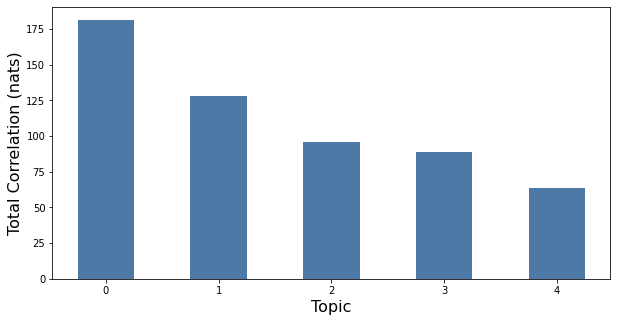

In [46]:
#selecting the number of topics 
#choose the number of topics by observing the distribution of TCs for each topic to see how much each additional
# topic contributes to the overall TC

plt.figure(figsize=(10,5))
plt.bar(range(topic_model.tcs.shape[0]), topic_model.tcs, color='#4e79a7', width=0.5)
plt.xlabel('Topic', fontsize=16)
plt.ylabel('Total Correlation (nats)', fontsize=16);

#the first topic is much more informative than the other topcs 
#topics up until 2 are the most informative 

In [47]:
#pointwise document TC 
#decomposing total correlation further
#the topic correlation is the average of the pointwise total correlations for each individual document
topic_model.log_z.shape # n_docs x k_topics

(23, 5)

In [48]:
print(np.mean(topic_model.log_z, axis=0))
print(topic_model.tcs)

#pointwise total correlations in log_z represent the correlations within an individual document explained by a particular topic
#these correlations have been used to measure how "surprising" documents are with respect to given topics

[181.47270506 127.92502089  95.67421883  88.84252335  63.79857458]
[181.47270506 127.92502089  95.67421883  88.84252335  63.79857458]


In [49]:
#hierarchical topic models
# Train a second layer to the topic model
tm_layer2 = ct.Corex(n_hidden=10)
tm_layer2.fit(topic_model.labels);

# Train a third layer to the topic model
tm_layer3 = ct.Corex(n_hidden=1)
tm_layer3.fit(tm_layer2.labels);